# Importações

In [24]:
from datetime import datetime
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dotenv import load_dotenv
import os

 # Setar os Headers

In [25]:
#  Configurar env
load_dotenv()

# Configurar chamadas para api coingecko
headers = {
    "x-cg-demo-api-key": os.getenv('API_KEY')
}
url_api = "https://api.coingecko.com/api/v3/"

# Buscar valors das criptos mais conhecidas

In [26]:
dados = {}
# Buscar dados
response = json.loads(requests.get(
    f"{url_api}coins/markets?vs_currency=usd&ids=bitcoin%2Cethereum%2Csolana",
    headers=headers).text)

for valores in response:
    dados[valores['name']] = {
        'valor_atual': f"U$ {valores['current_price']}",
        'maior_valor_24h': f"U$ {valores['high_24h']}",
        'menor_valor_24h': f"U$ {valores['low_24h']}",
        'porcentagem mudanca_preco':
        f"{valores['price_change_percentage_24h']:.3f}%",
        'valor_mudanca': f"U$ {valores['price_change_24h']:.2f}"
    }
df = pd.DataFrame(data=dados).T

# Renomear as colunas
df.columns = [
    'Preço Atual',
    'Maior Preço 24h',
    'Menor Preço 24h',
    'Porcentagem de Mudança (%)',
    'Valor da Mudança'
]
df_styled = df.style.set_properties(**{'text-align': 'center'})

# Centralizando os rótulos das colunas
df_styled = df_styled.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}])

display(df_styled)

,Preço Atual,Maior Preço 24h,Menor Preço 24h,Porcentagem de Mudança (%),Valor da Mudança
Bitcoin,U$ 68575,U$ 68754,U$ 68088,0.564%,U$ 384.81
Ethereum,U$ 2700.17,U$ 2714.16,U$ 2635.39,2.185%,U$ 57.73
Solana,U$ 160.27,U$ 160.93,U$ 155.83,2.664%,U$ 4.16


# Buscar criptos mais buscadas

In [27]:
dados = {}
# Buscar dados e transformar para json
response = json.loads(requests.get(
    url_api + 'search/trending', headers=headers).text)

# Formatar dados
for dado in response['coins']:
    dados[dado['item']['name']] = {
        'preco': f"U${dado['item']['data']['price']:.6f}",
        'crecimento': f"{dado['item']['data']['price_change_percentage_24h']['usd']:.2f}%"
    }

df = pd.DataFrame(data=dados).T
df.columns = [
    'Preço',
    'Crecimento',
]
df_styled = df.style.set_properties(**{'text-align': 'center'})


# Centralizando os rótulos das colunas
df_styled = df_styled.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}])

display(df_styled)

,Preço,Crecimento
Simon's Cat,U$0.000024,2.70%
MAGA Hat,U$0.000160,5.66%
Solidus Ai Tech,U$0.098470,-0.67%
KLAUS,U$0.044947,5.01%
ApeCoin,U$1.489172,99.76%
Goatseus Maximus,U$0.276942,-39.74%
SPX6900,U$0.731776,24.93%
Sui,U$2.126122,2.71%
DeepBook,U$0.088079,59.46%
Popcat,U$1.300567,1.31%


# Historico de preço Bitcoin

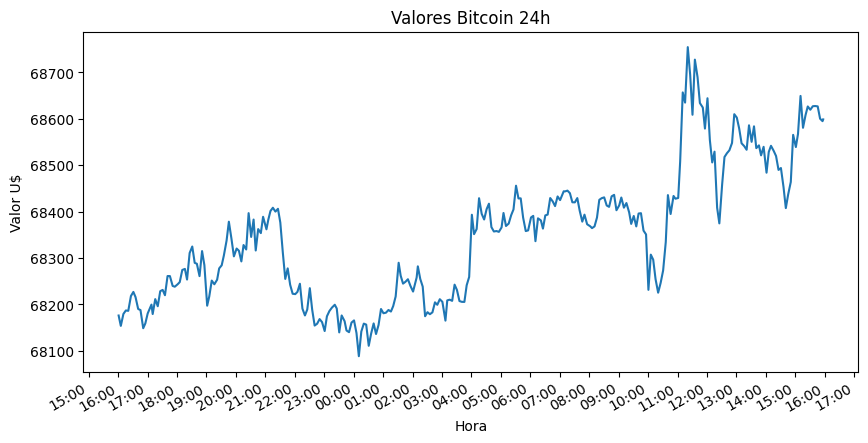

In [28]:
dados = {}

# Buscar dados
response = json.loads(requests.get(
    f"{url_api}coins/bitcoin/market_chart?vs_currency=usd&days=1",
    headers=headers).text)

# Formatar dados
dados['bitcoin'] = {
    'hora': [datetime.fromtimestamp(h[0] / 1000) for h in response['prices']],
    'valor': [v[1] for v in response['prices']]
}

# Montar grafico
fig, ax = plt.subplots(figsize=(10, 5))

# Adicionar dados ao grafico
ax.plot(dados['bitcoin']['hora'], dados['bitcoin']['valor'],
        label='Bitcoin')

# Ajustar eixo x para ter escala de 1h
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Deixar mais legivel e adicionar labels
plt.gcf().autofmt_xdate()
plt.xlabel('Hora')
plt.ylabel('Valor U$')
plt.title('Valores Bitcoin 24h')

plt.show()

# Crecimento Bitcoin

In [29]:
"""Valorizacao bitcoin 1d, 7d, 30d, 1 ano"""


def chamada_busca_historico(dias=None, moeda=None):
    """Trazer o response do busca historico"""

    response = json.loads(requests.get(
        f"""{url_api}coins/markets?vs_currency=usd&ids={moeda}
            &price_change_percentage={dias}""",
        headers=headers).text)

    return response

busca = ['1h', '24h', '7d', '30d', '1y']
dados = {}
# Buscar dados
for qtd in busca:
    response = chamada_busca_historico(dias=qtd, moeda='bitcoin')
    valor = response[0][f"price_change_percentage_{qtd}_in_currency"]
    dados[qtd] = {
        'porcentagem_crecimento':f"{valor:.2f}%"
        
    }
df = pd.DataFrame(data=dados)
df_styled = df.style.set_properties(**{'text-align': 'center'})


# Centralizando os rótulos das colunas
df_styled = df_styled.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}])
display(df_styled)

,1h,24h,7d,30d,1y
porcentagem_crecimento,0.03%,0.58%,9.80%,10.02%,132.33%
